In [135]:
##Task 1-Stock Price Prediction Using LSTM
## This project aims to develop a prediction model to predict the stock prices of the company using LSTM (Long Short Term Memory) Neural Network.
##Historical dataset of Google is taken for Prediction

## Importing the Libraries

In [111]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

## Load the dataset

In [112]:
# Load the CSV data into a pandas DataFrame
google_data = pd.read_csv(r"C:\Users\Admin\Downloads\Bharat Intern\GOOGL.csv")

## Checking any Missing Values

In [113]:
google_data.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

## Information of the data

In [114]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4763 entries, 0 to 4762
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          4763 non-null   object 
 1   Open          4763 non-null   float64
 2   High          4763 non-null   float64
 3   Low           4763 non-null   float64
 4   Close         4763 non-null   float64
 5   Volume        4763 non-null   int64  
 6   Dividends     4763 non-null   float64
 7   Stock Splits  4763 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 297.8+ KB


## Statistical Measures

In [115]:
google_data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,4763.000000,4763.000000,4763.000000,4763.000000,4.763000e+03,4763.0,4763.000000
mean,39.762061,40.179887,39.341565,39.769850,1.223242e+08,0.0,0.004619
std,36.434451,36.850922,36.030286,36.448726,1.503214e+08,0.0,0.291231
min,2.482232,2.546046,2.401401,2.502753,9.312000e+06,0.0,0.000000
25%,12.784910,12.929304,12.673673,12.792167,3.260720e+07,0.0,0.000000
50%,26.577499,26.832500,26.340500,26.605499,6.690503e+07,0.0,0.000000
75%,56.107248,56.778250,55.587502,56.147001,1.489289e+08,0.0,0.000000
max,151.250000,151.546494,148.899002,149.838501,1.643023e+09,0.0,20.000000


## Convert the 'Date' column to a datetime object

In [116]:
google_data['Date'] = pd.to_datetime(google_data['Date'], utc=True)

## Sort the data by date

In [117]:
google_data = google_data.sort_values('Date')

## Extract the 'Close' prices as the target variable

In [118]:
data = google_data[['Date', 'Close']].copy()

## Normalize the Data

In [120]:
scaler = MinMaxScaler()
data.loc[:, 'Close'] = scaler.fit_transform(data.loc[:, 'Close'].values.reshape(-1, 1))

## Split the Data into Training and Testing Sets

In [121]:
train_size = int(len(data) * 0.8)
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

## Prepare Data for LSTM

In [122]:
def create_sequences(data, seq_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        seq = data['Close'].values[i:i+seq_length]
        target = data['Close'].values[i+seq_length]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)

In [123]:
seq_length = 10  # Length of the input sequence
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

## Use a different loss function

In [124]:
loss_func = 'mean_absolute_error'

## Use a different optimizer

In [125]:
optimizer = 'rmsprop'

## Tune the hyperparameters of the LSTM model

In [126]:
epochs = 100
batch_size = 128

## Build the LSTM Model

In [127]:
model = Sequential()
model.add(LSTM(50, input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(loss=loss_func, optimizer=optimizer)

## Train the LSTM Model

In [128]:
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/100
30/30 [==============================] - 3s 14ms/step - loss: 0.0274
Epoch 2/100
30/30 [==============================] - 0s 13ms/step - loss: 0.0112
Epoch 3/100
30/30 [==============================] - 0s 14ms/step - loss: 0.0097
Epoch 4/100
30/30 [==============================] - 0s 15ms/step - loss: 0.0096
Epoch 5/100
30/30 [==============================] - 0s 14ms/step - loss: 0.0093
Epoch 6/100
30/30 [==============================] - 0s 15ms/step - loss: 0.0088
Epoch 7/100
30/30 [==============================] - 0s 15ms/step - loss: 0.0087
Epoch 8/100
30/30 [==============================] - 0s 16ms/step - loss: 0.0087
Epoch 9/100
30/30 [==============================] - 0s 15ms/step - loss: 0.0084
Epoch 10/100
30/30 [==============================] - 0s 15ms/step - loss: 0.0084
Epoch 11/100
30/30 [==============================] - 1s 18ms/step - loss: 0.0083
Epoch 12/100
30/30 [==============================] - 0s 15ms/step - loss: 0.0081
Epoch 13/100
30/30 [=====

## Make Predictions

In [131]:
y_pred = model.predict(X_test)

30/30 [==============================] - 0s 4ms/step


## Inverse transform the scaled predictions to get the actual stock prices

In [132]:
y_pred_actual = scaler.inverse_transform(y_pred)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

## Plot the actual vs. predicted stock prices

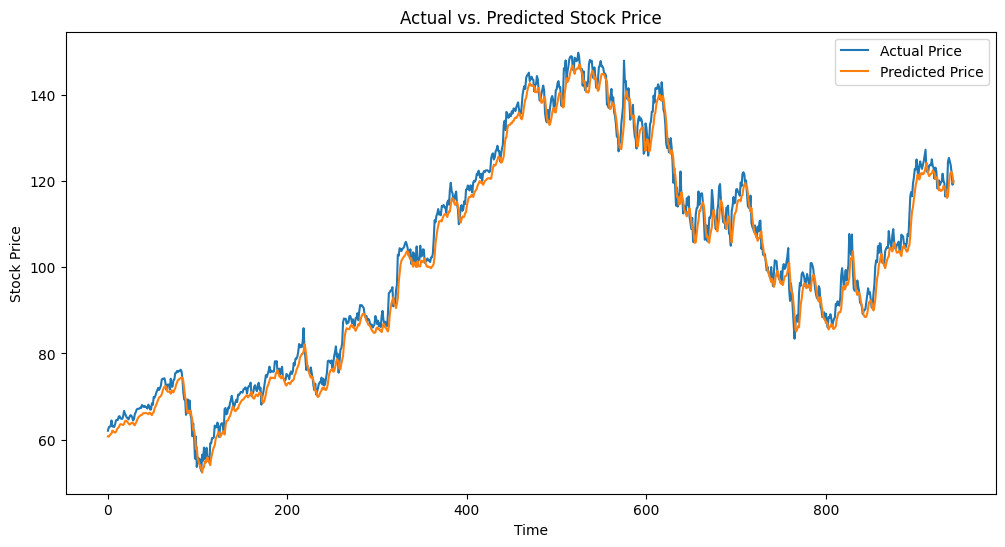

In [133]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual Price')
plt.plot(y_pred_actual, label='Predicted Price')
plt.legend()
plt.title('Actual vs. Predicted Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.show()

## Evaluation Metrics

In [136]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_actual, y_pred_actual)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test_actual, y_pred_actual)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2) score
r2 = r2_score(y_test_actual, y_pred_actual)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) score: {r2:.2f}")


Mean Absolute Error (MAE): 2.45
Mean Squared Error (MSE): 8.98
Root Mean Squared Error (RMSE): 3.00
R-squared (R2) score: 0.99


In [2]:
## Conclusion
## These metrics indicate that the model is performing quite well, with low errors and a high R-squared value (close to 1), suggesting that the model's predictions are in good agreement with the actual stock prices.